In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors


In [3]:
data = pd.read_csv(r"C:\Users\HP1000\Downloads\Participant-01.csv")
data

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


In [4]:
data.dropna()
data

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


In [5]:
data['Steps (count)'] = data['Steps (count)'].astype(int)
data

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153


In [6]:
new_data = data.drop(['Finish'],axis = 1)
new_data['Start'] = new_data['Start'].apply(pd.to_datetime) 

week = pd.DataFrame(new_data.resample('w',on = 'Start')['Steps (count)'].sum()).reset_index()
week

,Start,Steps (count)
0,2022-01-02,21939
1,2022-01-09,74612
2,2022-01-16,77170
3,2022-01-23,76815
4,2022-01-30,67913
5,2022-02-06,58371
6,2022-02-13,65889
7,2022-02-20,60379
8,2022-02-27,53185
9,2022-03-06,40054


In [7]:
avg = week['Steps (count)'].mean()
avg_int = int(avg)
print('The average steps for each week of this participant is {}'.format(avg_int))

The average steps for each week of this participant is 58556


In [8]:
ls = []
for value in week['Steps (count)']:
    if value >= 50000:
        ls.append('Low risk')
    else:
        ls.append('High risk')
dic = {'dia':ls}
week['diabetes'] = pd.DataFrame(dic)
week

,Start,Steps (count),diabetes
0,2022-01-02,21939,High risk
1,2022-01-09,74612,Low risk
2,2022-01-16,77170,Low risk
3,2022-01-23,76815,Low risk
4,2022-01-30,67913,Low risk
5,2022-02-06,58371,Low risk
6,2022-02-13,65889,Low risk
7,2022-02-20,60379,Low risk
8,2022-02-27,53185,Low risk
9,2022-03-06,40054,High risk


It was discovered that young adult should walk more than 10000 steps per day and at least walk for 5 days each week to reduce the risk of developing diabetes. As calculation, 50000 steps per week is the value distinguish between high and low risk values.

In [9]:
week['nth week'] = week.index + 1
week

,Start,Steps (count),diabetes,nth week
0,2022-01-02,21939,High risk,1
1,2022-01-09,74612,Low risk,2
2,2022-01-16,77170,Low risk,3
3,2022-01-23,76815,Low risk,4
4,2022-01-30,67913,Low risk,5
5,2022-02-06,58371,Low risk,6
6,2022-02-13,65889,Low risk,7
7,2022-02-20,60379,Low risk,8
8,2022-02-27,53185,Low risk,9
9,2022-03-06,40054,High risk,10


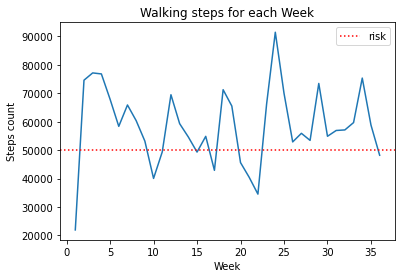

In [23]:
x = week['nth week']
y = week['Steps (count)']

plt.plot(x,y)
plt.axhline(50000,label = 'risk',linestyle = ':',color = 'r')
plt.title('Walking steps for each Week')
plt.xlabel('Week')
plt.ylabel('Steps count')
plt.legend()

plt.show()

In [11]:
X = week[['nth week','Steps (count)']]      # slice dataFrame for input variables
y = week['diabetes']        # slice dataFrame for target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
KNN = neighbors.KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)

reference: Colberg, S. R., Sigal, R. J., Fernhall, B., Regensteiner, J. G., Blissmer, B. J., Rubin, R. R., Chasan-Taber, L., Albright, A. L., & Braun, B. (2010). Exercise and type 2 diabetes: The American College of Sports Medicine and the American Diabetes Association: Joint position statement. Diabetes Care, 33(12), e147–e167. https://doi.org/10.2337/dc10-9990